In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
housing = pd.read_csv("housing_prices.csv")

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Exploratory Analysis

### Univariate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


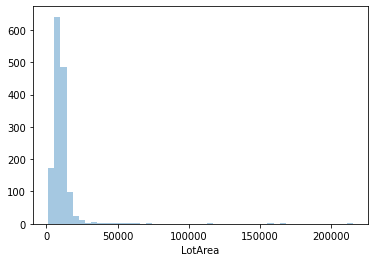

In [7]:
# Analyze the spread of the "LotArea" column

sns.distplot(housing["LotArea"], kde=False);

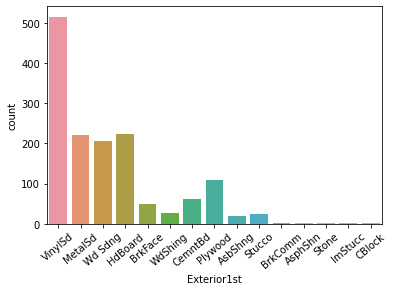

In [8]:
# What are the different types of housing exterios

plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

### Bi-variate Analysis

<b> Q: Does the price of the house depend on the lot area? </b>

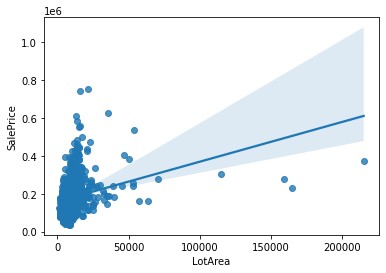

In [9]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)

In [10]:
# Are outliers skewing the relationship.. Redraw the relationshp after removing very large values
housing["LotArea"].quantile([0.5,0.95,0.99])
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

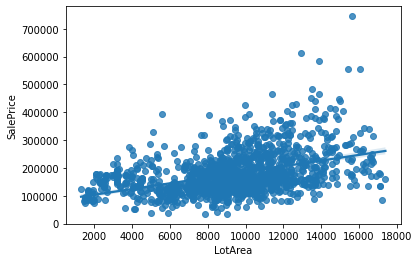

In [11]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing_sub)



In [12]:
housing["LotArea"].corr(housing["SalePrice"])
housing_sub["LotArea"].corr(housing_sub["SalePrice"])

0.2638433538714056

0.4302099912897767

### Plotting multiple graphs
<b> Q: Analyze the relationship between SalesPrice and all "Square Feet (SF)" related columns </b>

In [13]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]

In [14]:
len(sf_cols)

9

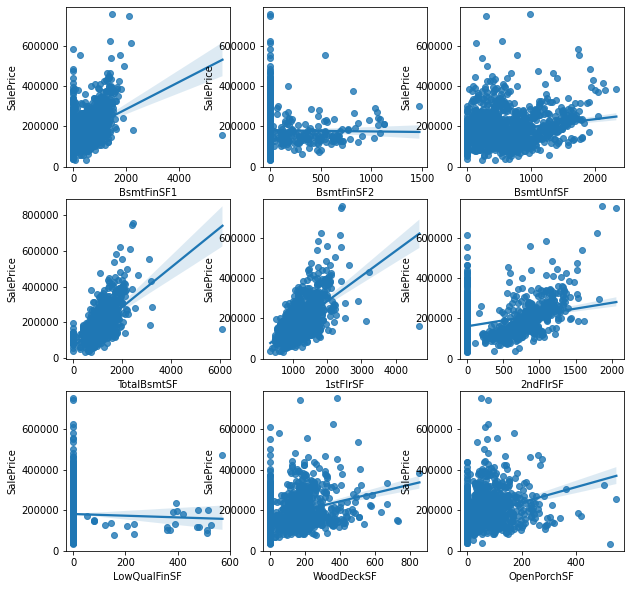

In [15]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i // 3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice", data = housing, ax=ax)

In [16]:
### Is the price of the house impacted by the Exterior covering on house
housing["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

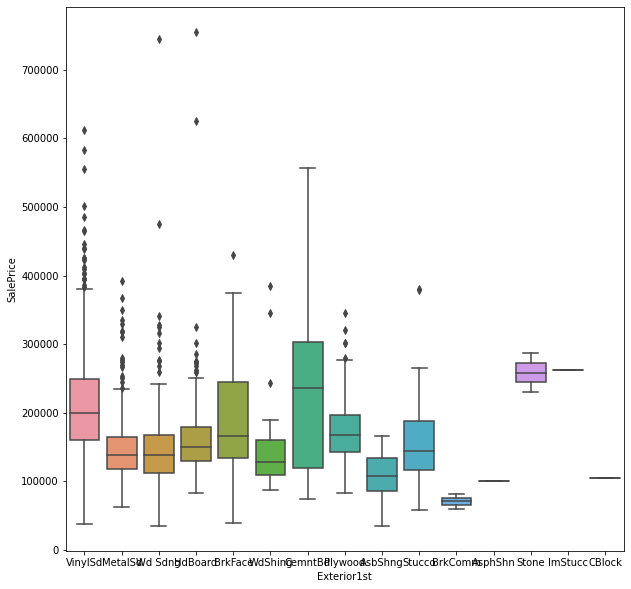

In [17]:
fig, axs = plt.subplots(figsize = (10,10))
sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs);

<b>Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

a) Create a new column - <i>"Exterior_New"</i> with only the top 3 values of Exterior in it. All other values are converted to "Others"

b) Plot the relationship between Sales price and this new columns

<b>Q2: Does the relationship between House exterior and Price change depending on how old the house is. For this question simply categorize houses into Old and New based on the condition: YearBuilt > 2000 "New" else "Old"</b>

<b> Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

In [18]:
top_3_exterior = housing["Exterior1st"].value_counts().head(3)

In [19]:
top_3_exterior = list(top_3_exterior.index)

In [20]:
housing["Exterior_new"] = np.where(housing["Exterior1st"].isin(top_3_exterior),housing["Exterior1st"],"Others")

In [21]:
housing["Exterior_new"].value_counts()

VinylSd    515
Others     503
HdBoard    222
MetalSd    220
Name: Exterior_new, dtype: int64

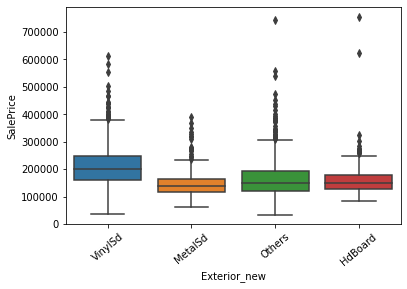

In [22]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b> Does the relationship between House exterior and Price change depending on how old the house is </b>

In [23]:
housing["new_house"] = np.where(housing["YearBuilt"] > 2000,"New","Old")

In [24]:
housing["new_house"].value_counts()

Old    1096
New     364
Name: new_house, dtype: int64

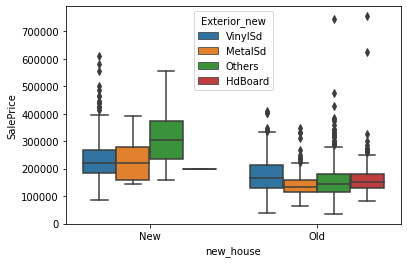

In [25]:
sns.boxplot(x = "new_house", y = "SalePrice", hue = "Exterior_new", data = housing);

In [26]:
housing.groupby(["Exterior_new","new_house"]).agg({"SalePrice":["count", "median"]})

SalePrice          
                           count    median
Exterior_new new_house                    
HdBoard      New               1  198500.0
             Old             221  149900.0
MetalSd      New              19  222000.0
             Old             201  135000.0
Others       New              35  303477.0
             Old             468  142976.5
VinylSd      New             309  219500.0
             Old             206  167075.0

<b> Has the type of exterior changed for newer homes compared to older houses </b>



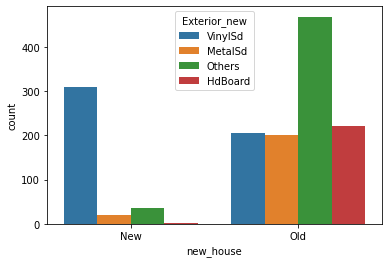

In [27]:
sns.countplot(x = "new_house", data = housing, hue = "Exterior_new");